# Data Analysis - Lab 2
### M. Sébastien MASCHA
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:
 
- Numpy to manipulate arrays
- matplotlib to plot graphics
- pandas to import csv
- scipy for mathematicals usage
- maths for sqrt, pi, exp

In [7]:
# coding: utf-8

import data
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from math import sqrt,pi,exp

<br/>
<br/>

___
# Exercice A - Multivariate data set : Fisher Iris
In this exercice, we study the Iris data set.
#### Question 1 - Open iris.csv as a matrice

We use the comma separator because we saw in the text editor that the data was separated
by commas.

In [8]:
dataframe = pd.read_csv("data/iris.csv")
print(dataframe.shape)

dataframe.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,51,35,14,2
1,49,30,14,2
2,47,32,13,2
3,46,31,15,2
4,50,36,14,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11255c3c8>,
      dtype=object)

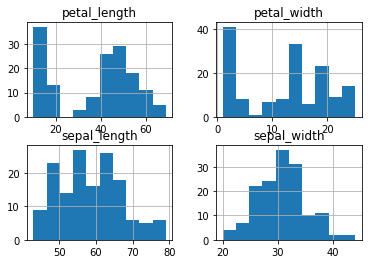

In [9]:
dataframe.hist()

In [10]:
dataframe.index

RangeIndex(start=0, stop=150, step=1)

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null int64
sepal_width     150 non-null int64
petal_length    150 non-null int64
petal_width     150 non-null int64
dtypes: int64(4)
memory usage: 4.8 KB


In [12]:
covMatrix = np.zeros((4, 4))
corrMatrix = np.zeros((4, 4))

In [13]:
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)


    cov = np.sum((a-a_mean)*(b-b_mean))/(len(a)-1)
    return cov
for i in range(dataframe.shape[1]):
    for j in range(dataframe.shape[1]):
        y= cov(dataframe.iloc[: , i],dataframe.iloc[: , j])
        covMatrix[i][j]=y
        corrMatrix[i][j]= covMatrix[i][j]/(np.std(dataframe.iloc[: , i]) * np.std(dataframe.iloc[: , j]))
print(covMatrix)
print(corrMatrix)


[[ 68.56935123  -4.24340045 127.43154362  51.62706935]
 [ -4.24340045  18.99794183 -32.96563758 -12.16393736]
 [127.43154362 -32.96563758 311.62778523 129.5609396 ]
 [ 51.62706935 -12.16393736 129.5609396   58.1006264 ]]
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [14]:
dataframe.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,68.569351,-4.243400,127.431544,51.627069
sepal_width,-4.243400,18.997942,-32.965638,-12.163937
petal_length,127.431544,-32.965638,311.627785,129.560940
petal_width,51.627069,-12.163937,129.560940,58.100626


In [15]:
dataframe.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


/Users/Pierre/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


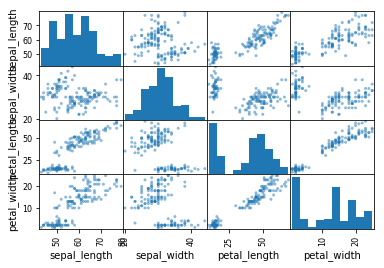

In [34]:
corrMatrix = pd.scatter_matrix(data)
plt.show()

In [40]:
print(type(dataframe.shape[1]))
def IC95():
    ic_matriceinf = np.zeros((dataframe.shape[1], dataframe.shape[1]))
    ic_matricesup = np.zeros((dataframe.shape[1], dataframe.shape[1]))
    for i in range(dataframe.shape[1]):
        for j in range(dataframe.shape[1]):
            r = cov(dataframe.iloc[: , i],dataframe.iloc[: , j])
            Z = np.log(1 + r) - np.log(1 - r)/2
            sz = sqrt(1/(dataframe.shape[1] - 3))
            Zinf = Z - 1.96*sz
            Zsup = Z + 1.96*sz
            ic_matriceinf[i][j]= (exp(2*Zinf) - 1)/(exp(2*Zinf) + 1)
            ic_matricesup[i][j]= (exp(2*Zsup) - 1)/(exp(2*Zsup) + 1)
    return ic_matriceinf  
IC95()

<class 'int'>


/Users/Pierre/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])